# Topic 18: Bode Design Approach

In [40]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

p = Symbol('p')
z = Symbol('z')
s = sympy.Symbol('s')       # define `s` as symbol
j = complex(0,1)

try:
    import bodas
except:
    %pip install bodas
    import bodas

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d
from control import bode_plot, nyquist_plot
from control_materials import *

Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found


## 18-7 Kv calc


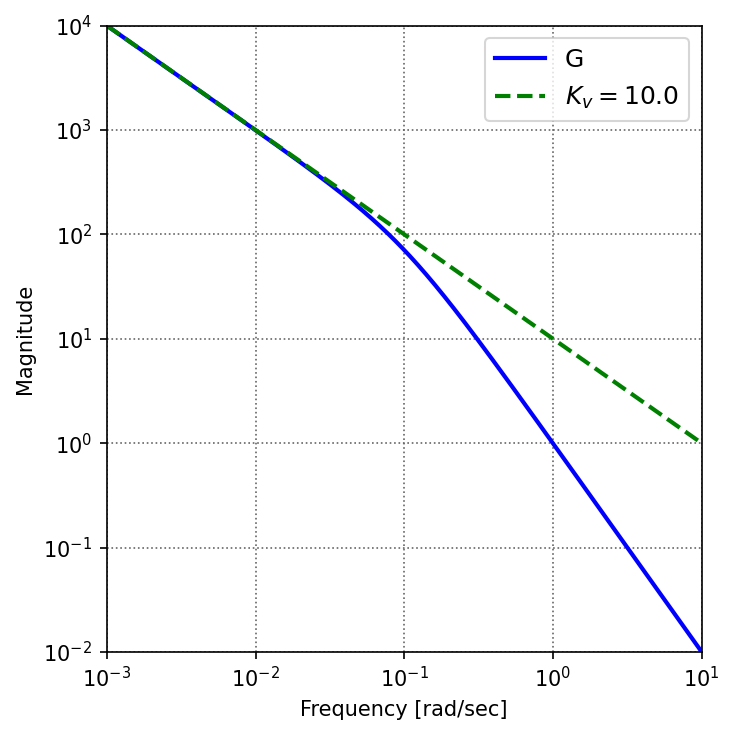

In [41]:
w = logspace(-3,1,500)
G = tf([1],[1,.1,0])
Kv = find_Kv(G)
fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,sharex=True)
[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
ax.loglog(Gw,Gm,'b-',label='G')
ax.loglog(Gw,Kv/Gw,'g--',label='$K_v={:3.1f}$'.format(Kv))
ax.legend(fontsize=12)
ax.set_ylim([1e-2,1e4])
ax.set_xlim([1e-3,1e1])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L16_Kv.pdf',dpi=600)
plt.show()


# Lead Design On 18-13

In [53]:
w = logspace(-1,np.log10(100),500)
G = tf([10],[1,1,0])
Kv = find_Kv(G)

PM = 40
wc_des = 10
w = np.sort(np.append(logspace(-1,3,500),wc_des))

phi_G = -180. # approx
phi_m = (PM - (180 + phi_G))/r2d
zdp = (1-np.sin(phi_m))/(1+np.sin(phi_m))
z = wc_des*np.sqrt(zdp)
p = z/zdp
Gc_lead = tf([1, z],[1, p]) 
L = G*Gc_lead
k_c = 1/np.abs(L(j*wc_des))
Gc_lead *= k_c
L = G*Gc_lead


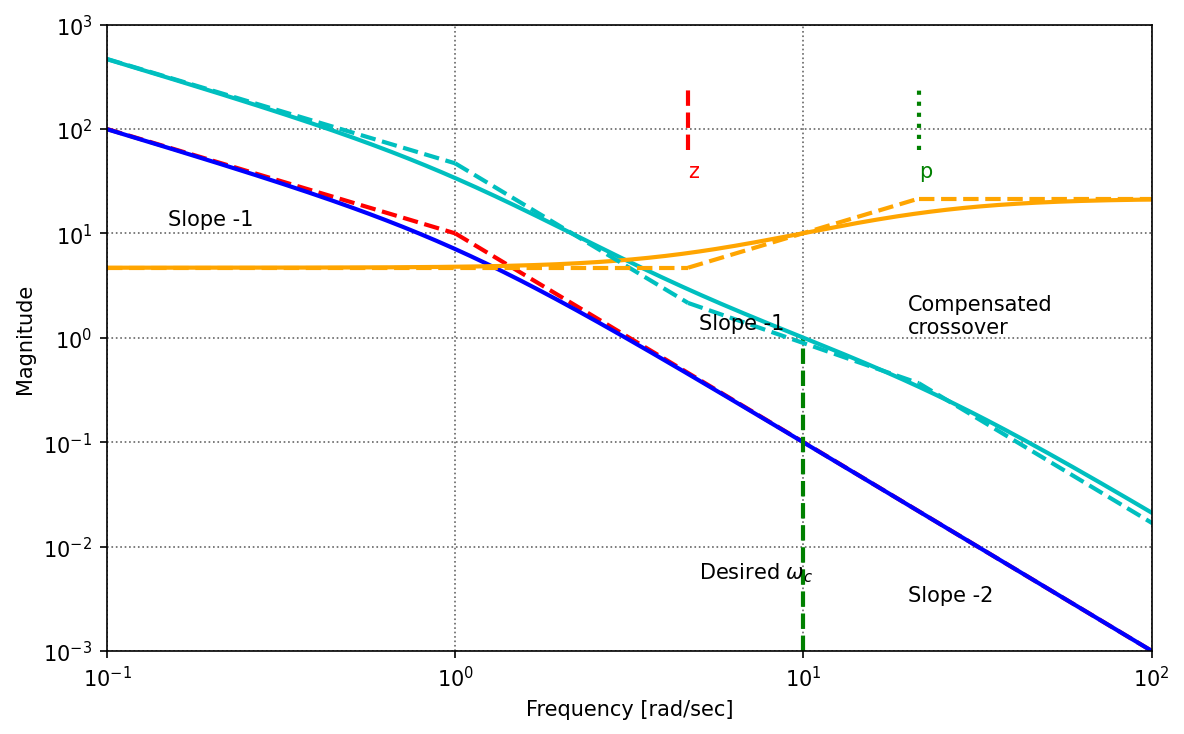

In [54]:
fig, ax = plt.subplots(1,figsize=(5,5),dpi=150,sharex=True)
[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[Gcm,Gcp,Gcw] = bode_plot(Gc_lead,plot=False,omega=w)
ax.loglog((np.min(w),1),(Kv/np.min(w),Kv/1),'r--',label='G')
ax.loglog((1,max(w)),(Kv/1,Kv/max(w)**2),'r--',label='G')
ax.loglog(Gw,Gm,'b-',label='G')
ax.text(5,5e-3,'Desired $\omega_c$')
ax.axvline(x=wc_des,ymin=0,ymax=.5,c='g',ls='--')
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
ax.text(20,3e-3,'Slope -2')
ax.text(.15,12,'Slope -1')
ax.set_ylim([1e-3,1000])
ax.set_xlim([1e-1,1e2])
savefig('./figs/L16_12a.pdf',dpi=600)

ax.loglog(Gw,Gm*Gcm,'c-',label='G')
ax.loglog(Gw,Gcm,'orange',label='Gc')

ax.loglog((np.min(w),1),(k_c*z/p*Kv/np.min(w),k_c*z/p*Kv/1),'c--',label='GGc')
ax.loglog((1,z),(k_c*z/p*Kv/1,k_c*z/p*Kv/z**2),'c--',label='GGc')
ax.loglog((z,p),(k_c*z/p*Kv/z**2,k_c*z/p*Kv/p**2*(p-z)/z),'c--',label='GGc')
ax.loglog((p,np.max(w)),(k_c*z/p*Kv/p**2*(p-z)/z,k_c*z/p*Kv/np.max(w)**2*(p-z)/z),'c--',label='GGc')

ax.loglog((min(w),z),(k_c*z/p,k_c*z/p),'orange',label='Gc',ls='--')
ax.loglog((z,p),(k_c*z/p,k_c),'orange',label='Gc',ls='--')
ax.loglog((p,np.max(w)),(k_c,k_c),'orange',label='Gc',ls='--')

ax.axvline(x=z,ymin=.8,ymax=.9,c='r',ls='--')
ax.text(z,35,'z',color='r')
ax.axvline(x=p,ymin=.8,ymax=.9,c='g',ls=':')
ax.text(p,35,'p',color='g')
ax.text(20,1.1,'Compensated\ncrossover')
ax.text(5,1.2,'Slope -1')
#ax.legend(fontsize=12)
ax.set_ylim([1e-3,1000])
ax.set_xlim([1e-1,1e2])
nicegrid(ax)
fig.set_size_inches(8, 5)
savefig('./figs/L16_12.pdf',dpi=600)
plt.show()

if 0:
    Gtest = (s+z)/(s+p)/(s+1)/s
    w = logspace(-1,2,500)
    sympy.pretty_print(Gtest)
    bodas.plot(Gtest,savefig='svg',w=w,show_actual_plot=True) 


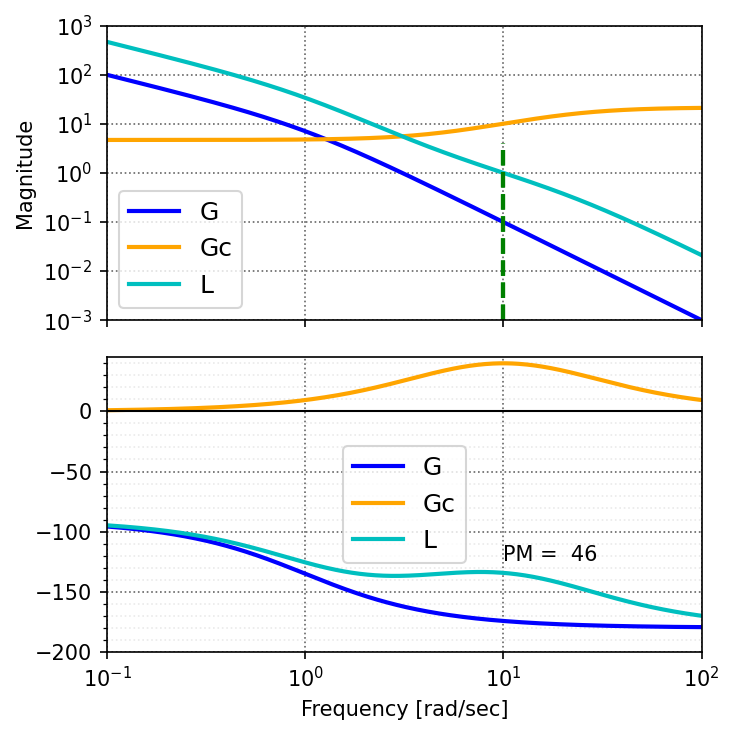

In [55]:
fig, ax = plt.subplots(2,1,figsize=(5,5),dpi=150,sharex=True)
[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
[Gcm,Gcp,Gcw] = bode_plot(Gc_lead,plot=False,omega=w)
[Lm,Lp,Lw] = bode_plot(L,plot=False,omega=w)

ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gcw,Gcm,'orange',label='Gc')
ax[0].loglog(Lw,Lm,'c-',label='L')
ax[0].axvline(x=wc_des,ymin=0,ymax=.6,c='g',ls='--')

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gcw,r2d*pshift(Gcp),'orange',label='Gc')
ax[1].semilogx(Lw,r2d*pshift(Lp),'c-',label='L')
ax[0].axvline(x=wc_des,ymin=0,ymax=.6,c='g',ls='--')

II = np.argwhere(w==wc_des)[0][0]
Lp_wc = Lp[II]*r2d
ax[1].text(wc_des,Lp_wc+10,'PM = {:3.0f}'.format(180+Lp_wc))

ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[0].set_ylim([1e-3,1000])
ax[1].set_ylim([-200,45])
ax[1].set_xlim([1e-1,1e2])
ax[0].set_ylabel("Magnitude")
ax[1].set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L16_13.pdf',dpi=600)
plt.show()


## Lead Example 
$$ G = \frac{1}{s(s^2+8s+15)} $$

In [ ]:
G = tf(1,np.convolve([1, 0],[1, 8, 15]))
wc = 5
PM = 40

Gf = G(j*wc)
phi_G = pshift(cmath.phase(Gf))*r2d
if phi_G > 0:
    phi_G -= 360
print(f"Phase of the plant at {wc = :4.2f} rad/sec is {phi_G = :4.2f} degs")
print(f"Desired Phase Margin is {PM = :4.2f} degs")

# Design Lead to improve PM
phi_m = (PM + (-180-phi_G))
print(f"Required Phase to add is {phi_m = :4.2f} degs")
phi_m = phi_m/r2d
zdp = (1-np.sin(phi_m))/(1+np.sin(phi_m))
z = np.sqrt(wc**2*zdp)
p = z/zdp

Gc = tf([1, z],[1, p]) 
L = G*Gc
k_c = 1/np.abs(L(j*wc)) # Gain to make L(jwc) = 1
Gc *= k_c # increase the gain of the compensator
L *= k_c # increase the gain of the loop transfer function
Gcl = feedback(L,1)

Phase of the plant at wc = 5.00 rad/sec is phi_G = -194.04 degs
Desired Phase Margin is PM = 40.00 degs
Required Phase to add is phi_m = 54.04 degs


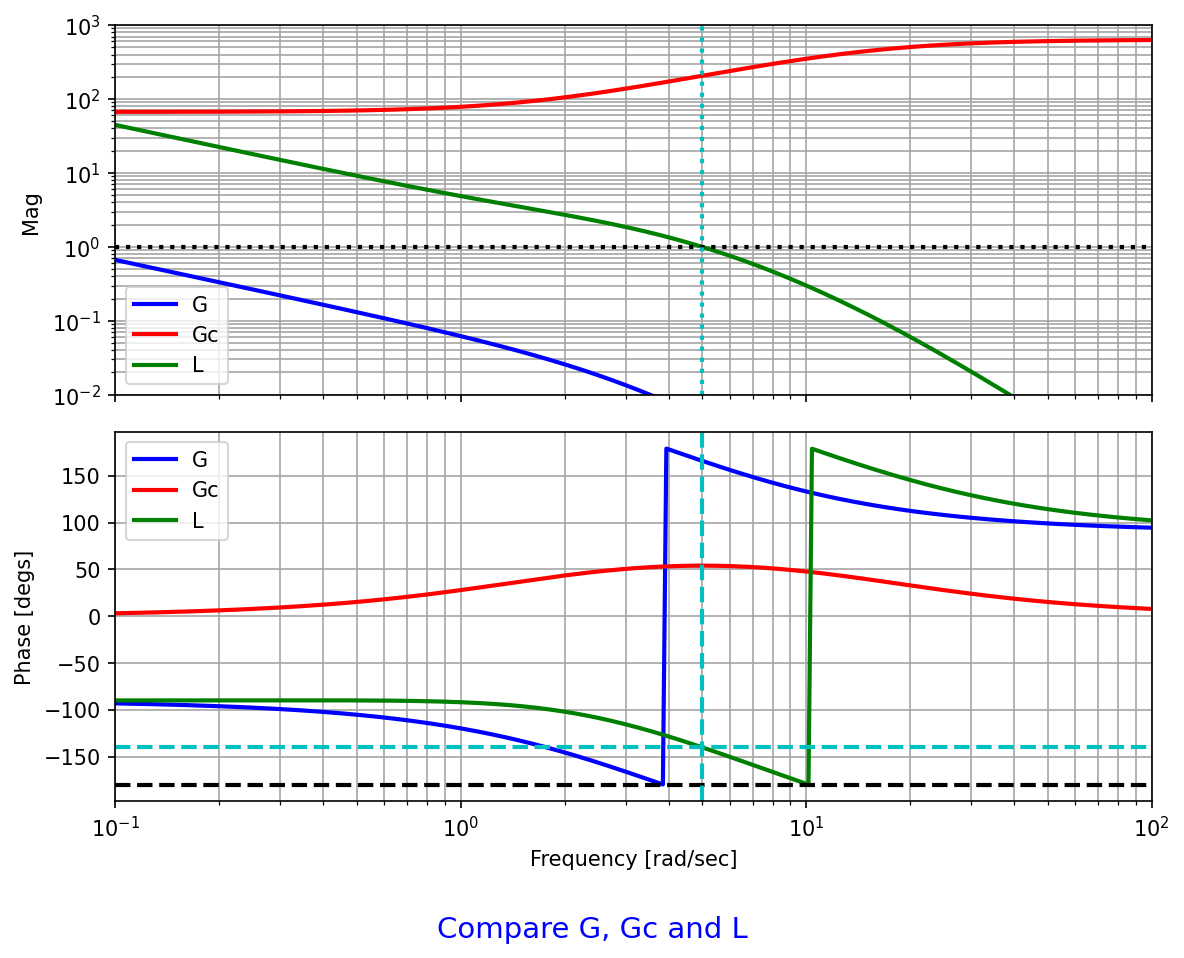

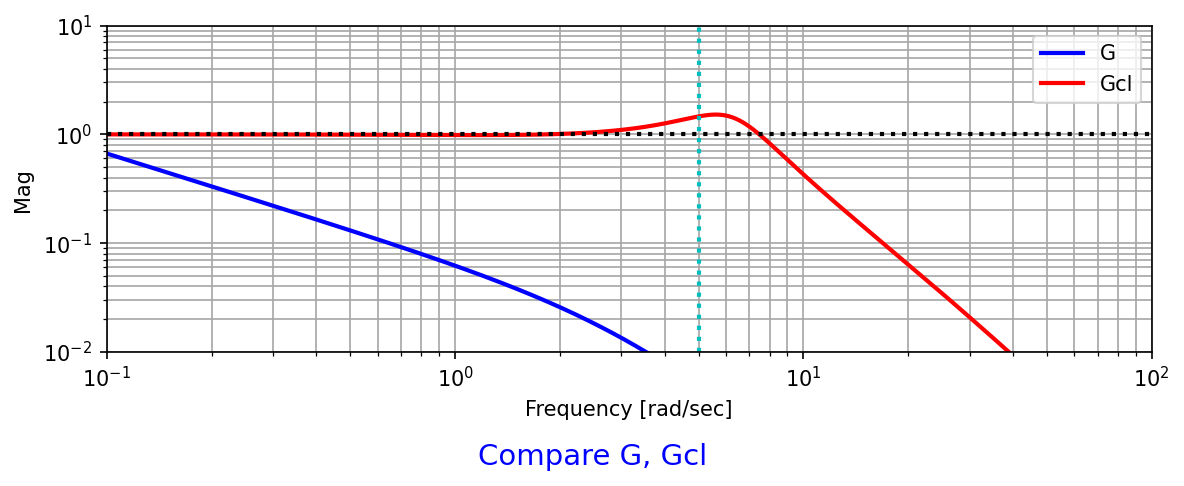

In [ ]:
w = np.sort(np.append(logspace(-1,np.log10(100),300),wc)) #include wc in the frequency list

Gf = G(j*w); Gm = np.abs(Gf); Gp = np.angle(Gf); Gw = w;
Gcf = Gc(j*w); Gcm = np.abs(Gcf); Gcp = np.angle(Gcf); Gcw = w;
Lf = L(j*w); Lm = np.abs(Lf); Lp = np.angle(Lf); Lw = w;
Gclf = Gcl(j*w); Gclm = np.abs(Gclf); Gclp = np.angle(Gclf); Gclw = w;

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gcw,Gcm,'r-',label='Gc')
ax[0].loglog(Lw,Lm,'g-',label='L')
ax[0].axhline(y=1,c='k',ls=":")
ax[0].axvline(x=wc,c='c',ls=":")
ax[0].legend()
ax[0].set_ylim([.01,1000])
ax[0].set_ylabel("Mag ")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gcw,pshift(Gcp)*r2d,'r-',label='Gc')
ax[1].semilogx(Lw,pshift(Lp)*r2d,'g-',label='L')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axhline(y=-180+PM,c='c',ls="--")
ax[1].axvline(x=wc,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
#ax[1].set_ylim([-270,0])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_ylabel("Phase [degs]")
caption("Compare G, Gc and L",fig)
plt.legend()
ax[0].grid(True, which="both", ls="-",color='0.65')
ax[1].grid(True, which="both", ls="-",color='0.65')
plt.show()

fig, ax = plt.subplots(1,figsize=(8, 3),dpi=150,sharex = True)
ax.loglog(Gw,Gm,'b-',label='G')
ax.loglog(Gclw,Gclm,'r-',label='Gcl')
ax.axhline(y=1,c='k',ls=":")
ax.axvline(x=wc,c='c',ls=":")
ax.legend()
ax.set_ylim([.01,10])
ax.set_ylabel("Mag ")
ax.set_xlabel("Frequency [rad/sec]")
caption("Compare G, Gcl",fig)
ax.grid(True, which="both", ls="-",color='0.65')
plt.show()

## Example using double lead 

In [ ]:
G = tf(1,[1, 1])**3
wc_des = 10
K = 1/np.abs(G(j*wc_des))
PM_G = 180 - r2d*np.angle(G(j*wc_des))
print(f"{PM_G = :3.1f}")
G = G*K
PM_goal = 35
PM_des = (35+PM_G)/2. # double lead

w = np.sort(np.append(logspace(-1,3,300),wc_des))
[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

Gc_lead = lead_design(G, wc_des = wc_des, PM = PM_des)
# double lead
Gc_lead = Gc_lead*Gc_lead
PM_act = r2d*np.angle(G(j*wc_des)*Gc_lead(j*wc_des)) + 180

[Gcm,Gcp,Gcw] = bode_plot(Gc_lead,plot=False,omega=w)


PM_G = 72.9


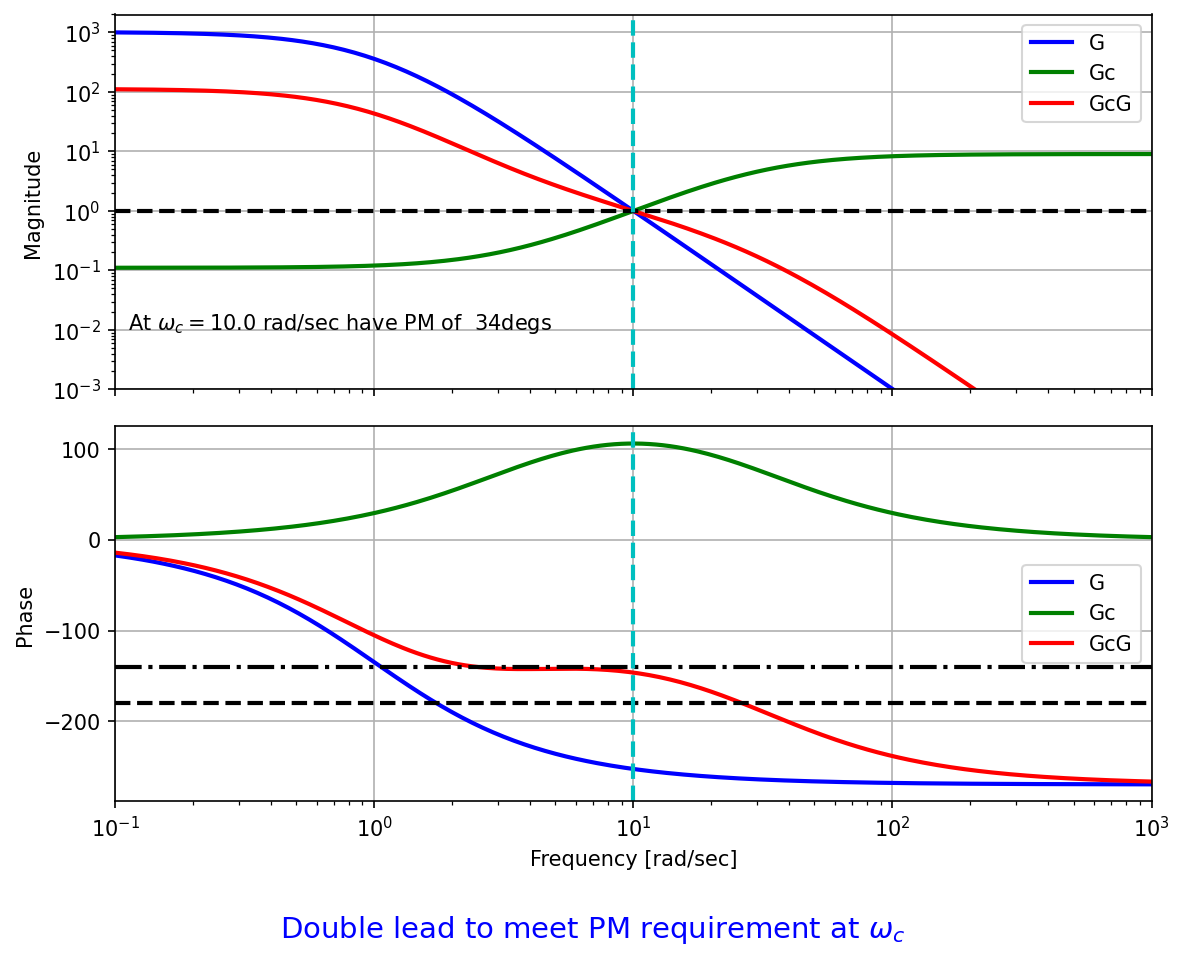

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(Gw,Gm,'b-',label='G')
ax[0].loglog(Gcw,Gcm,'g-',label='Gc')
ax[0].loglog(Gw,Gcm*Gm,'r-',label='GcG')
ax[0].axhline(y=1,c='k',ls="--")
ax[0].axvline(x=wc_des,c='c',ls="--")
ax[0].text(min(w),.01,'  At $\omega_c=${:3.1f} rad/sec have PM of {:3.0f}degs'.format(wc_des,PM_act))
ax[0].legend()
ax[0].set_ylim([.001,2000])
ax[0].set_ylabel("Magnitude")

ax[1].semilogx(Gw,pshift(Gp)*r2d,'b-',label='G')
ax[1].semilogx(Gw,pshift(Gcp)*r2d,'g-',label='Gc')
ax[1].semilogx(Gw,pshift(Gcp)*r2d+pshift(Gp)*r2d,'r-',label='GcG')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].axhline(y=-180+PM,c='k',ls="-.")
ax[1].axvline(x=wc_des,c='c',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_ylabel("Phase")
#ax[1].set_ylim([-270,0])
ax[1].set_xlabel("Frequency [rad/sec]")
caption("Double lead to meet PM requirement at $\omega_c$",fig)
plt.legend()
savefig("./figs/E208_2_6.pdf", dpi=600)
plt.show()